# Classifying newswires: a multiclass classification example

In this section, you’ll build a model to classify Reuters newswires into 46 mutually exclusive
topics. Because you have many classes, this problem is an instance of multiclass classification;
and because each data point should be classified into only one category, the problem is more
specifically an instance of single-label, multiclass classification. If each data point could belong
to multiple categories (in this case, topics), you’d be facing a multilabel, multiclass classification
problem.

## The Reuters dataset

You’ll work with the Reuters dataset, a set of short newswires and their topics, published by
Reuters in 1986. It’s a simple, widely used toy dataset for text classification. There are 46
different topics; some topics are more represented than others, but each topic has at least 10
examples in the training set.

Like IMDB and MNIST, the Reuters dataset comes packaged as part of Keras.

In [1]:
from tensorflow.keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=5000)

2110848/2110848 [==============================] - 0s 0us/step


In [2]:
len(train_data)

8982

In [3]:
len(test_data)

2246

In [4]:
train_data[20]

[1,
 779,
 37,
 38,
 465,
 278,
 2,
 55,
 900,
 6,
 2,
 172,
 4,
 2,
 2,
 66,
 474,
 10,
 920,
 24,
 41,
 2,
 2,
 1333,
 136,
 4,
 37,
 38,
 309,
 2276,
 198,
 2020,
 364,
 2061,
 6,
 439,
 2249,
 1327,
 5,
 37,
 38,
 465,
 247,
 348,
 4,
 460,
 356,
 990,
 1589,
 8,
 136,
 1053,
 3373,
 634,
 330,
 116,
 2061,
 1185,
 6,
 2,
 198,
 236,
 1176,
 6,
 3037,
 2,
 1693,
 238,
 1720,
 990,
 309,
 415,
 265,
 2,
 2,
 1149,
 2,
 23,
 779,
 10,
 103,
 5,
 465,
 278,
 2,
 7,
 42,
 1267,
 6,
 2,
 4,
 3373,
 7,
 269,
 10,
 583,
 43,
 6,
 2070,
 1762,
 6,
 30,
 3069,
 13,
 4,
 1185,
 199,
 8,
 4,
 2,
 348,
 990,
 313,
 415,
 265,
 2,
 2,
 1149,
 2,
 2,
 2,
 1149,
 2,
 1460,
 2,
 1149,
 2,
 1251,
 2,
 1149,
 2,
 9,
 2,
 2,
 1324,
 2,
 75,
 91,
 2,
 172,
 4,
 66,
 474,
 10,
 1220,
 6,
 2,
 1968,
 398,
 9,
 2841,
 22,
 342,
 203,
 4,
 1220,
 2,
 27,
 2953,
 2412,
 2,
 1324,
 2775,
 41,
 2,
 4,
 2,
 5,
 182,
 7,
 4441,
 552,
 58,
 45,
 203,
 62,
 3045,
 2,
 6,
 37,
 38,
 398,
 2,
 474,
 2,
 22,
 10,
 

In [5]:
train_labels[20]

11

In [6]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])


550378/550378 [==============================] - 0s 0us/step


In [7]:
reverse_word_index[1]

'the'

In [8]:
decoded_newswire = ' '.join([reverse_word_index.get(i, '?') for i in train_data[20]])
decoded_newswire

"the iran has would those during of or research and of common in of of about possible for limited by 5 of of brothers month in has would seven jointly companies workforce opec pushed and inflation sure vote said has would those through continue in crop part case expressed mln month brazilian pushing bundesbank increased 20 pushed round and of companies money world's and numbers of anti statement governments case seven york i of of process of cts iran for government said those during of a not nakasone and of in pushing a 22 for year's loss and 133 hopes and will 167 it in round fell mln in of continue case terms york i of of process of of of process of significantly of process of considered of process of 3 of of buyers of two march of common in about possible for wednesday and of makers 80 3 acting its so years in wednesday of be receiving fast of buyers questions 5 of in of said when a merchants quota 7 1986 years oil acceptances of and has would 80 of possible of its for exchange wash

In [9]:
train_labels[10]

3

### Preparing the data

In [10]:
# Encoding the input data
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [11]:
x_train[10]

array([0., 1., 0., ..., 0., 0., 0.])

To vectorize the labels, there are two possibilities:
* You can cast the label list as an integer tensor (sparse_categorical_crossentropy)
* You can use one-hot encoding (categorical_crossentropy)

One-hot encoding is a widely used format for categorical data, also called categorical encoding.

In [12]:
# Encoding the labels
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [13]:
one_hot_train_labels[20]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

**there is a built-in way to do this in Keras:**

In [14]:
from tensorflow.keras.utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)
one_hot_train_labels[20]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

## Building your model

There is a new constraint here: the number of output classes has gone from 2 to 46. The dimensionality of the output space is much larger.

**In a stack of Dense layers like that you’ve been using, each layer can only access information
present in the output of the previous layer. If one layer drops some information relevant to the
classification problem, this information can never be recovered by later layers: each layer can
potentially become an information bottleneck. In the previous example, you used 16-dimensional
intermediate layers, but a 16-dimensional space may be too limited to learn to separate 46
different classes: such small layers may act as information bottlenecks, permanently dropping
relevant information.**

In [15]:
## Dense layers > 46 nodes
## Output layer activation function?
## Loss function -> categorical_crossentropy

In [16]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [29]:
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])


In [30]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 99ms/step - loss: 2.7282 - accuracy: 0.4345 - val_loss: 1.8556 - val_accuracy: 0.6250
Epoch 2/20
16/16 [==============================] - 1s 87ms/step - loss: 1.5764 - accuracy: 0.6769 - val_loss: 1.3914 - val_accuracy: 0.6920
Epoch 3/20
16/16 [==============================] - 1s 60ms/step - loss: 1.2088 - accuracy: 0.7390 - val_loss: 1.1993 - val_accuracy: 0.7340
Epoch 4/20
16/16 [==============================] - 1s 49ms/step - loss: 0.9993 - accuracy: 0.7799 - val_loss: 1.0923 - val_accuracy: 0.7690
Epoch 5/20
16/16 [==============================] - 1s 46ms/step - loss: 0.8405 - accuracy: 0.8183 - val_loss: 1.0085 - val_accuracy: 0.7990
Epoch 6/20
16/16 [==============================] - 1s 55ms/step - loss: 0.7102 - accuracy: 0.8488 - val_loss: 0.9558 - val_accuracy: 0.7970
Epoch 7/20
16/16 [==============================] - 1s 47ms/step - loss: 0.6049 - accuracy: 0.8691 - val_loss: 0.9006 - val_accuracy: 0.8210
Epoch 8/20
16

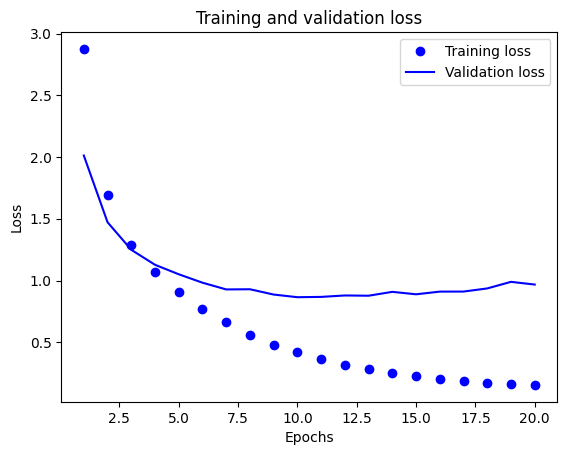

In [20]:
import matplotlib.pyplot as plt
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

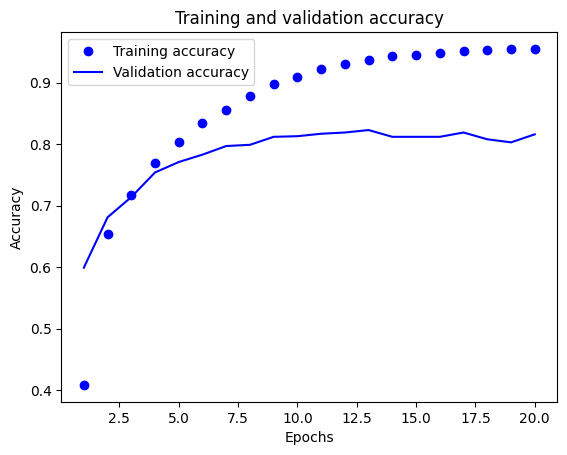

In [21]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [25]:
results = model.evaluate(x_test, one_hot_test_labels)


71/71 [==============================] - 0s 4ms/step - loss: 0.9175 - accuracy: 0.7912


In [28]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 64)                640064    
                                                                 
 dense_10 (Dense)            (None, 4)                 260       
                                                                 
 dense_11 (Dense)            (None, 46)                230       
                                                                 
Total params: 640554 (2.44 MB)
Trainable params: 640554 (2.44 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
## Problema de compresión de información.
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(4, activation="relu"),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

model.fit(partial_x_train,partial_y_train,epochs=8,batch_size=512,validation_data=(x_val, y_val))


Epoch 1/8
16/16 [==============================] - 2s 86ms/step - loss: 3.7196 - accuracy: 0.0135 - val_loss: 3.5608 - val_accuracy: 0.0100
Epoch 2/8
16/16 [==============================] - 1s 52ms/step - loss: 3.4095 - accuracy: 0.0115 - val_loss: 3.2705 - val_accuracy: 0.0290
Epoch 3/8
16/16 [==============================] - 1s 53ms/step - loss: 3.1004 - accuracy: 0.2031 - val_loss: 2.9972 - val_accuracy: 0.2600
Epoch 4/8
16/16 [==============================] - 1s 56ms/step - loss: 2.8149 - accuracy: 0.2626 - val_loss: 2.7619 - val_accuracy: 0.2640
Epoch 5/8
16/16 [==============================] - 1s 56ms/step - loss: 2.5781 - accuracy: 0.2704 - val_loss: 2.5656 - val_accuracy: 0.2680
Epoch 6/8
16/16 [==============================] - 1s 56ms/step - loss: 2.3693 - accuracy: 0.2800 - val_loss: 2.3888 - val_accuracy: 0.2740
Epoch 7/8
16/16 [==============================] - 1s 56ms/step - loss: 2.1619 - accuracy: 0.3046 - val_loss: 2.1837 - val_accuracy: 0.5120
Epoch 8/8
16/16 [===

In [27]:
results = model.evaluate(x_test, one_hot_test_labels)

71/71 [==============================] - 0s 4ms/step - loss: 2.0007 - accuracy: 0.5931
